In [1]:
from thermostability.autoencoder import RepresentationAutoEncoder, Decoder, Encoder
import torch

input = torch.rand((10,4,8))

encoder = Encoder(per_residue_input_size=8, per_residue_output_size=2)

representation, size_matrix = encoder(torch.rand((1,4,8)))

print("representation size", representation.size())


representation size torch.Size([1, 2, 2])


In [2]:
decoder = Decoder(representation_size=encoder.representation_square_axis_len, per_residue_output_size=8)

decoded = decoder(representation, size_matrix)

TypeError: empty() received an invalid combination of arguments - got (tuple, dtype=NoneType, device=NoneType), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of SymInts size, *, torch.memory_format memory_format, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


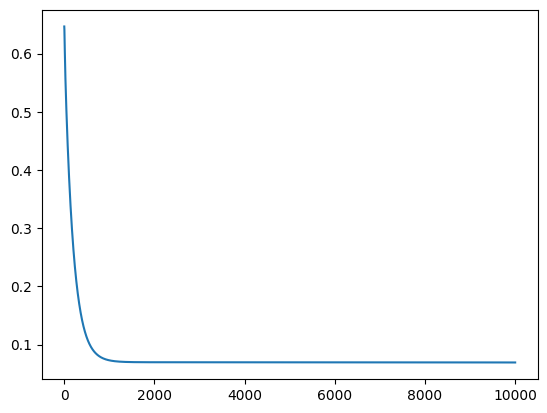

In [ ]:
from matplotlib.pyplot import plot 

autoencoder = RepresentationAutoEncoder(per_residue_input_size=8, per_residue_output_size=2)

loss_fn = torch.nn.MSELoss()


optimizer = torch.optim.SGD(autoencoder.parameters(), lr=0.001, momentum=0.9)

losses = []
for i in range(10000):
    optimizer.zero_grad()
    decoded = autoencoder(input)

    loss = loss_fn(decoded, input)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plot(range(len(losses)),losses)

In [ ]:
input[0]

tensor([[0.2617, 0.4315, 0.8977, 0.1804, 0.2174, 0.6058, 0.8594, 0.5276],
        [0.3220, 0.5237, 0.7293, 0.1660, 0.5761, 0.5551, 0.8198, 0.8639],
        [0.1084, 0.6882, 0.6130, 0.2076, 0.2306, 0.3028, 0.5107, 0.2421],
        [0.0452, 0.9566, 0.2690, 0.1911, 0.4204, 0.7175, 0.6827, 0.5111]])

In [ ]:
autoencoder(input)[0]

tensor([[0.4606, 0.4781, 0.5071, 0.4817, 0.4704, 0.6285, 0.4534, 0.4527],
        [0.4606, 0.4781, 0.5071, 0.4817, 0.4704, 0.6285, 0.4534, 0.4527],
        [0.4606, 0.4781, 0.5071, 0.4817, 0.4704, 0.6285, 0.4534, 0.4527],
        [0.4606, 0.4781, 0.5071, 0.4817, 0.4704, 0.6285, 0.4534, 0.4527]],
       grad_fn=<SelectBackward0>)